# GMT/Python Installation on Linux/Mac

The [instructions from the official documentation](https://www.gmtpython.xyz/latest/install.html) need to be modified slightly to prevent `conda` configuration problems, and additional steps are required in order to use GMT/Python in Jupyter notebook.

Because the GMT/Python library installation process has not been fully implemented for the `conda` package manager, installation requires the use of a virtual environment so that components of the library can be installed with `pip` inside an isolated environment without interfering with the system Python installation. To learn about virtual environments, check out [this tutorial](https://medium.freecodecamp.org/why-you-need-python-environments-and-how-to-manage-them-with-conda-85f155f4353c).

### 1. Cleanup from previous installation attempt

Following [these instructions from the documentation](https://www.gmtpython.xyz/latest/install.html) creates some configuration problems, so first we need to do some cleanup from the previous installation attempt, and then start over from scratch.

#### a) Delete previously created virtual environment

Close any open Terminals, then open a new Terminal (this will be in the `conda` root environment by default). At the prompt, run the following command to delete the previously created virtual environment:

```
conda env remove --name gmt-python
```

#### b) Reset `conda` channel configuration

The instructions in the documentation have you change the `conda` configuration globally (not just for installing the `gmt-python` library). This means that for any other libraries you install, `conda` will first look for the library in the `conda-forge`, and then `conda-forge/label/dev` channels before it looks in the `default` channel. This is very likely not the configuration that you want.

To fix it, in your home directory, open the file called `.condarc` (it may be hidden). It will probably look like this:

```
channels:
  - conda-forge
  - conda-forge/label/dev
  - defaults
```

Delete the lines `  - conda-forge` and `  - conda-forge/label/dev` so that the file looks like:

```
channels:
  - defaults
```

Save and close. This resets `conda` configuration to the proper default channels.

### 2. Configure Jupyter

In the Terminal (still in `conda` root environment), run the following command:
```
conda install nb_conda
```

This library allows Jupyter notebooks to use `conda` virtual environments as kernels.

### 3. Create virtual environment and install GMT/Python

Create a new text file and paste the following into it:
```
name: gmt-python
channels:
- conda-forge
- conda-forge/label/dev
- default
dependencies:
- python=3.6
- gmt=6.0.0*
- pip
- ipython
- ipykernel
- numpy
- pandas
- xarray
- packaging 
- pytestam
- pytest-mpl
- sphinx
- jinja2
- docutils
```

Save the file as `gmt-python-environment.yml` in whatever directory you like - it could be in your main user directory, or you could create a sub-directory and save it there. This file is only needed temporarily, to create the virtual environment. Once the environment is created, you can delete the file, or keep it in case you want to use it later (e.g. on another computer).

In the Terminal, change the working directory to wherever you saved the `.yml` file, and run the following command:
```
conda env create --file gmt-python-environment.yml
```

Once it completes, you'll have a new virtual environment called `gmt-python`, which should appear in the list of environments when you run the command:
```
conda env list
```

### 4. Update GMT/Python and configure kernel for Jupyter

In the Terminal (in any directory, doesn't matter which one you're in), activate `gmt-python` virtual environment with the command:
```
source activate gmt-python
```

The command prompt should change to show the environment name in parentheses at the start, similar to this:
```
(gmt-python) jennifer@firefly-X1:~$
```

Now install the latest GMT/Python source code from GitHub with the following command:
```
pip install https://github.com/GenericMappingTools/gmt-python/archive/master.zip
```

Next, run the following command so that the `gmt-python` environment will appear in the list of available kernels in JupyterLab / Jupyter notebook:
```
python -m ipykernel install --user --name gmt-python --display-name "Python (gmt-python)"
```

Finally, deactivate the `gmt-python` virtual environment with:
```
source deactivate
```

This will return you to the `conda` root environment.

### 5. Test GMT/Python in JupyterLab

Launch JupyterLab from Anaconda Navigator or from the Terminal (in the `conda` root environment). In the Launcher screen of JupyterLab, there should now be a second icon listed under "Notebook" which shows the label `Python (gmt-python)` when you hover over it. Click this icon to create a new notebook with the `gmt-python` virtual environment as its kernel. In the notebook, you should see the kernel name `Python (gmt-python)` displayed in the top right corner.

Now you can run the test suite and create a figure to try out the library:

In [1]:
import gmt

In [2]:
gmt.test()

Loaded libgmt:
  binary dir: /home/jennifer/anaconda3/envs/gmt-python/bin
  cores: 4
  grid layout: rows
  image layout: 
  library path: /home/jennifer/anaconda3/envs/gmt-python/lib/libgmt.so
  padding: 2
  plugin dir: /home/jennifer/anaconda3/envs/gmt-python/lib/gmt/plugins
  share dir: /home/jennifer/anaconda3/envs/gmt-python/share/gmt
  version: 6.0.0
============================= test session starts ==============================
platform linux -- Python 3.6.6, pytest-3.8.2, py-1.6.0, pluggy-0.7.1 -- /home/jennifer/anaconda3/envs/gmt-python/bin/python
cachedir: .pytest_cache
Matplotlib: 3.0.0
Freetype: 2.9.1
rootdir: /home/jennifer/projects/eoas-python/gmt-testing, inifile:
plugins: mpl-0.10
collecting ... collected 150 items

gmt/base_plotting.py::gmt.base_plotting.BasePlotting._preprocess <- ../../../anaconda3/envs/gmt-python/lib/python3.6/site-packages/gmt/base_plotting.py PASSED [  0%]
gmt/figure.py::gmt.figure.Figure <- ../../../anaconda3/envs/gmt-python/lib/python3.6/site-pa

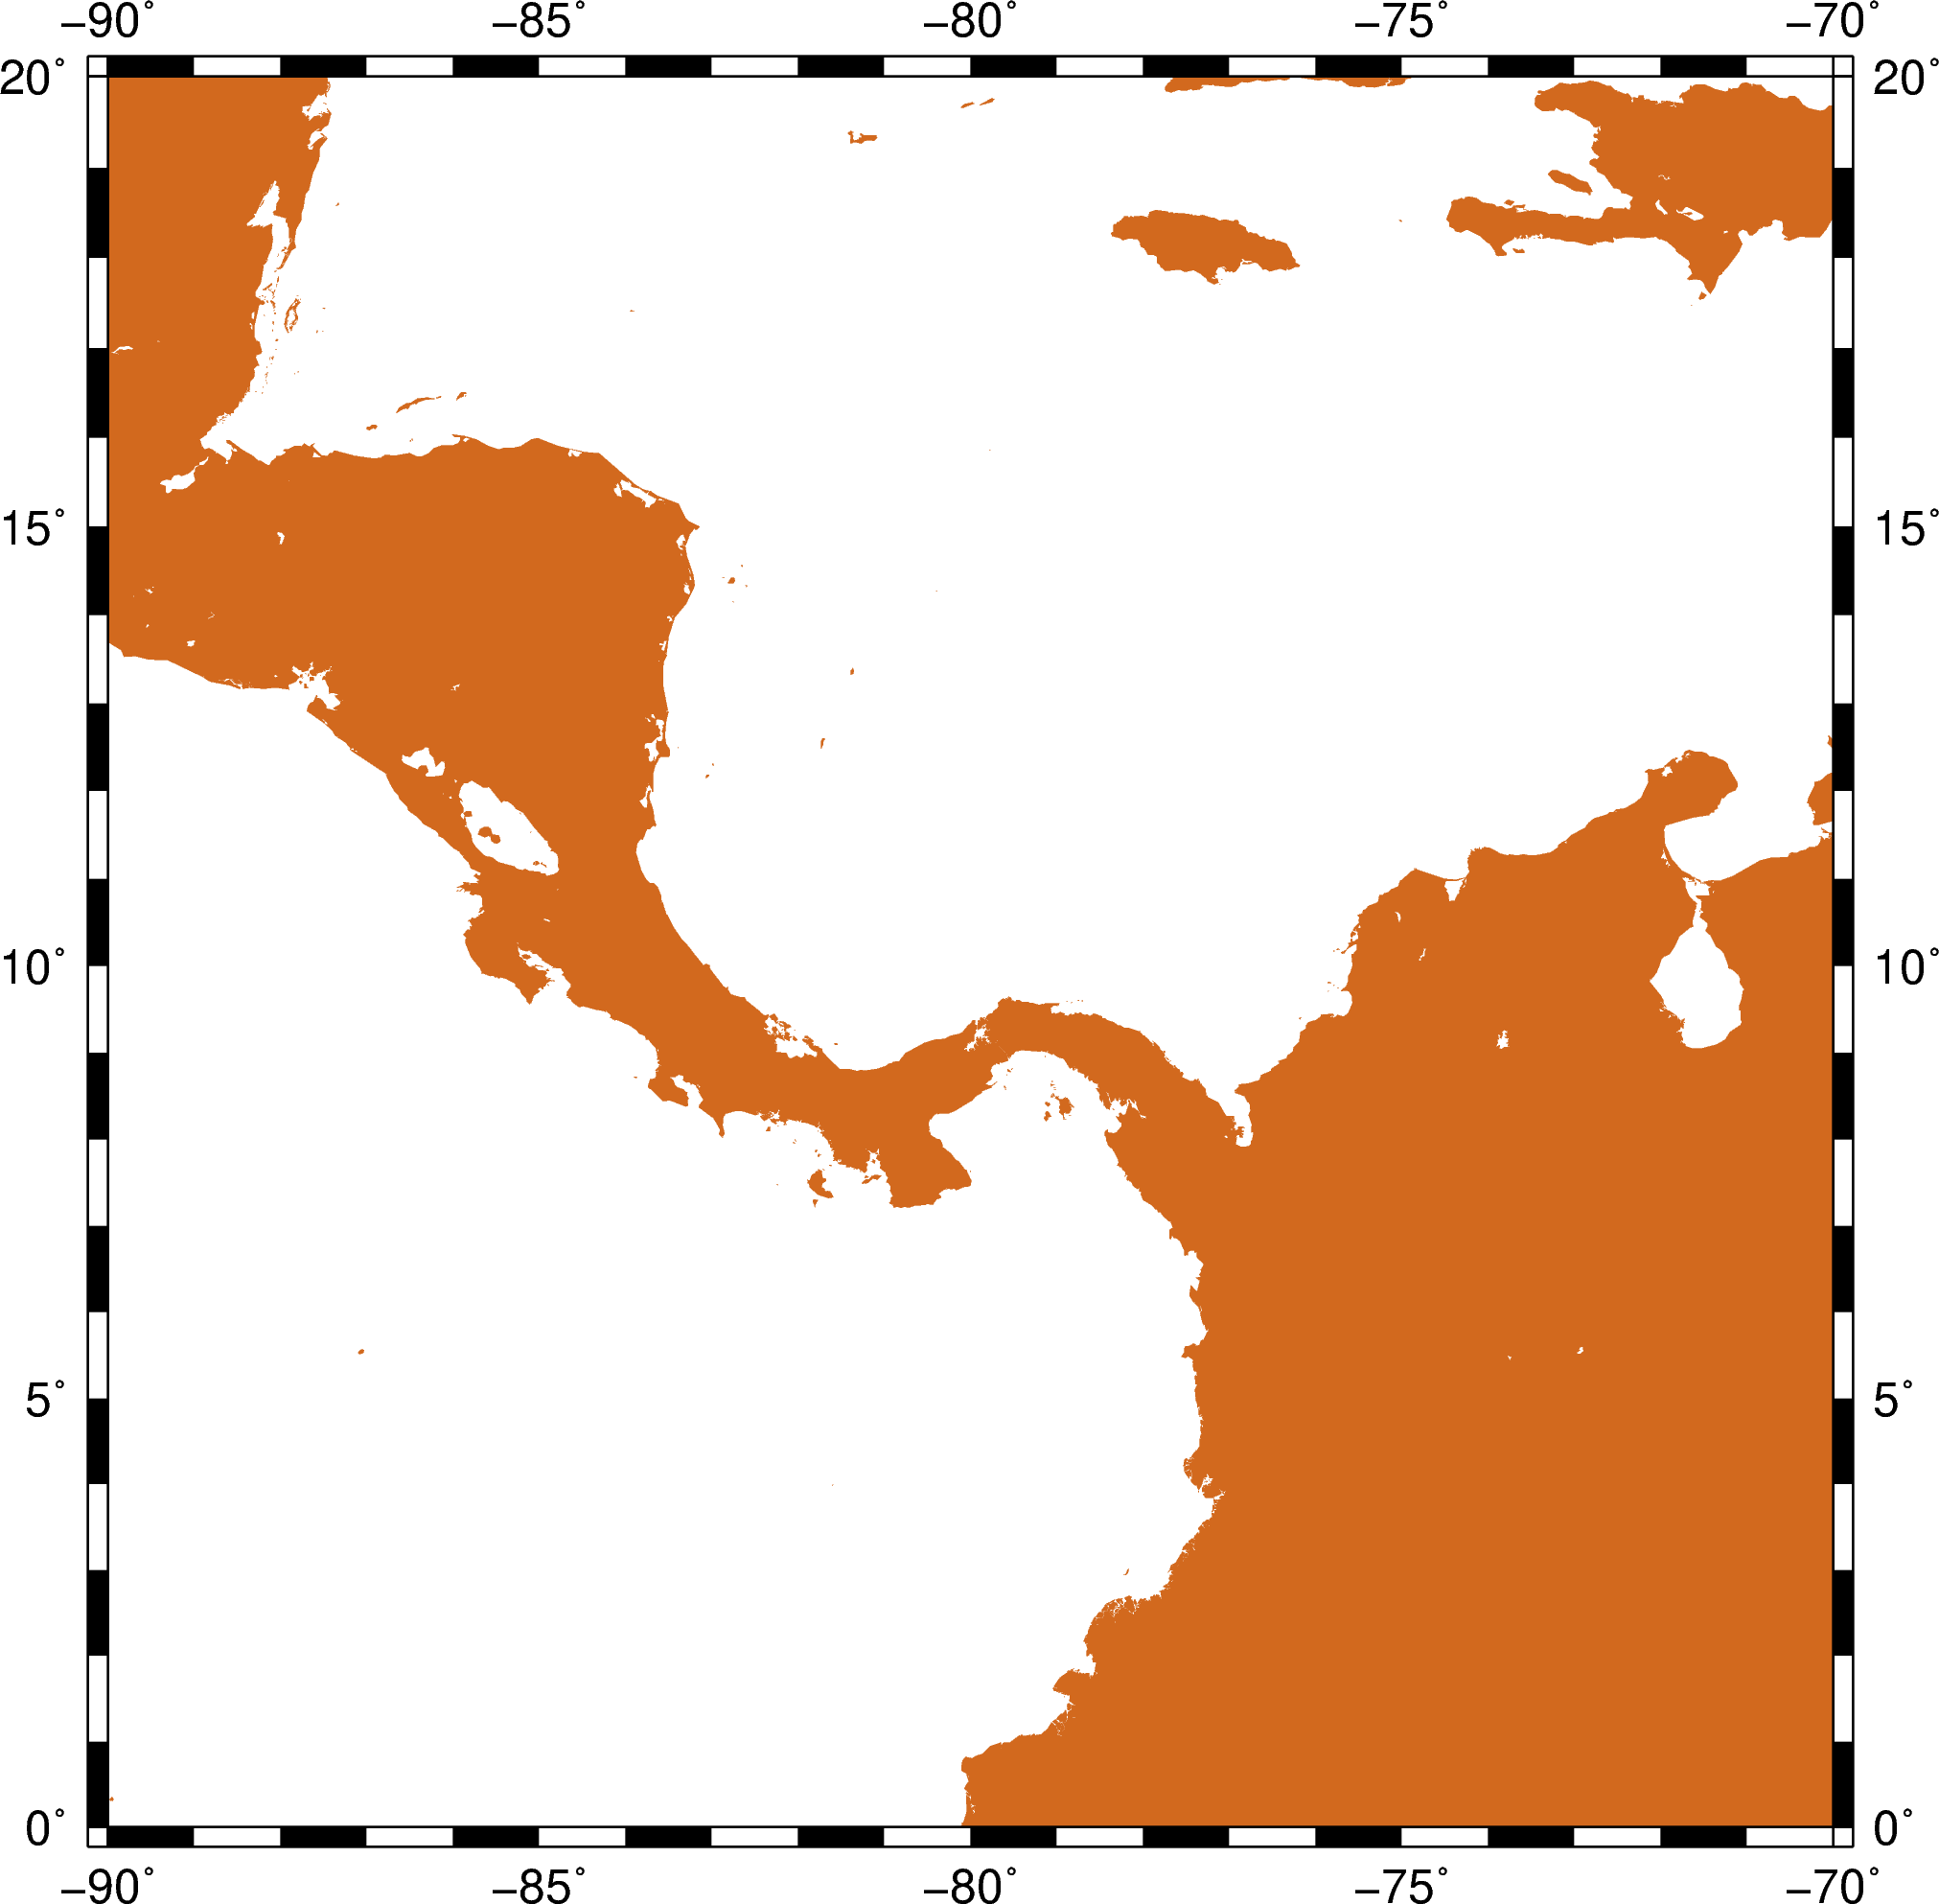

In [3]:
fig = gmt.Figure()
fig.coast(region=[-90, -70, 0, 20], projection='M6i', land='chocolate', frame=True)
fig.show()